In [1]:
%load_ext autoreload
%autoreload 2

import anndata as ad
import matplotlib.pyplot as plt
from mmd_wrapper import mmd_combine
from mmd_wrapper.utilities import alignment_visualize, pairwise_error
import numpy as np
import pandas as pd

from commando import ComManDo

2021-11-26 15:01:04.420306: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-26 15:01:04.420338: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Instructions for updating:
non-resource variables are not supported in the long term


# Read Data

In [2]:
data_mod1 = ad.read_h5ad('OPSCA/openproblems_bmmc_multiome_starter/openproblems_bmmc_multiome_starter.mod1.h5ad')
data_mod2 = ad.read_h5ad('OPSCA/openproblems_bmmc_multiome_starter/openproblems_bmmc_multiome_starter.mod2.h5ad')

# Run Mapping

In [16]:
commando_optimized = (
    ComManDo(
        distance_mode='spearman',
        two_step_aggregation='random',
        
        two_step_num_partitions=5,
        two_step_include_large=False,
        epoch_pd=1000,
        two_step_pd_large=1000,
        
        log_pd=500,
        two_step_log_pd=2,
    )
    .fit_transform([data_mod1, data_mod2])
)

use random seed: 666
Two-Step group sizes
Min: 100
Max: 100
Shape of Raw data
Dataset 0: (500, 600)
Dataset 1: (500, 600)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 1
Calculating intra-group F #2
epoch:[500/1000] err:0.0519 alpha:0.9493
epoch:[1000/1000] err:0.0523 alpha:0.9595
Calculating intra-group F #4
epoch:[500/1000] err:0.0552 alpha:0.9482
epoch:[1000/1000] err:0.0556 alpha:0.9584
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
Calculating intra-group F #2
epoch:[500/1000] err:0.0684 alpha:1.2506
epoch:[1000/1000] err:0.0691 alpha:1.2640
Calculating intra-group F #4
epoch:[500/1000] err:0.0693 alpha:1.1909
epoch:[1000/1000] err:0.0700 alpha:1.2037
---------------------------------
Find correspondence between Dataset 2 and Dataset 2
Calculating intra-group F #2
epoch:[500/1000] err:0.0539 alpha:0.9588
epoch:[1000/1000] err:0.0545 alpha:0.9691
Calculating intra-group F #4
epoch:[500/1000] er

In [18]:
commando_normal = (
    ComManDo(
        distance_mode='euclidean',
        epoch_pd=2000,
        log_pd=1000,
    )
    .fit_transform([data_mod1, data_mod2])
)

use random seed: 666
Shape of Raw data
Dataset 0: (500, 600)
Dataset 1: (500, 600)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 1
epoch:[1000/2000] err:0.2452 alpha:0.7784
epoch:[2000/2000] err:0.2526 alpha:0.9009
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[1000/2000] err:0.9675 alpha:4.7544
epoch:[2000/2000] err:0.9727 alpha:5.5069
---------------------------------
Find correspondence between Dataset 2 and Dataset 2
epoch:[1000/2000] err:0.7436 alpha:0.7920
epoch:[2000/2000] err:0.6264 alpha:0.9179
Finished Matching!
---------------------------------
Performing NLMA
Constructing Dense W
Applying Coefficients
Computing Laplacian
Calculating eigenvectors
Filtering eigenvectors
Perfoming mapping
---------------------------------
ComManDo Done!
Time: 27.671913862228394 seconds


# Evaluate

ComManDo Optimized Pairwise Error: 6.055444773286581
ComManDo Normal Pairwise Error:    6.3064546523673926


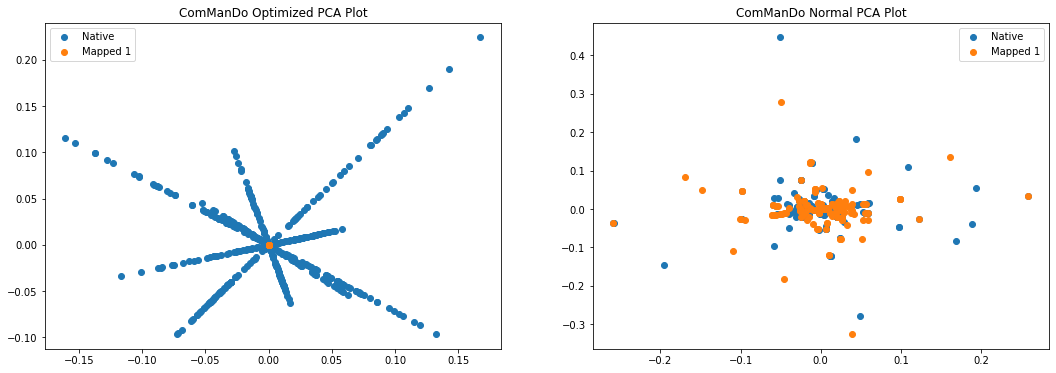

In [19]:
print('ComManDo Optimized Pairwise Error: ' + str(pairwise_error(*commando_optimized, normalize_by_feature=True)))
print('ComManDo Normal Pairwise Error:    ' + str(pairwise_error(*commando_normal, normalize_by_feature=True)))

plt.subplots(figsize=(18, 6))
plt.subplot(1, 2, 1)
alignment_visualize(*commando_optimized, alg_name='ComManDo Optimized')

plt.subplot(1, 2, 2)
alignment_visualize(*commando_normal, alg_name='ComManDo Normal')